# IS 4487 Assignment 7: Data Transformation with Airbnb Listings

In this assignment, you will:
- Load the Airbnb dataset you cleaned in Assignment 6
- Apply data transformation techniques like scaling, binning, encoding, and feature creation
- Make the dataset easier to use for tasks like pricing analysis, guest segmentation, or listing recommendations
- Practice writing up your analysis clearly so a business audience — like a host, marketing manager, or city partner — could understand it

## Why This Matters

Airbnb analysts, hosts, and city partners rely on clean and well-structured data to make smart decisions. Whether they’re adjusting prices, identifying high-performing listings, or designing better guest experiences, they need data that’s transformed, organized, and ready for use.

This assignment helps you practice that kind of real-world thinking: taking messy real data and getting it ready for action.

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Assignments/assignment_07_data_transformation.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>



## Dataset Description

The dataset you'll be using is a **detailed Airbnb listing file**, available from [Inside Airbnb](https://insideairbnb.com/get-the-data/).

Each row represents one property listing. The columns include:

- **Host attributes** (e.g., host ID, host name, host response time)
- **Listing details** (e.g., price, room type, minimum nights, availability)
- **Location data** (e.g., neighborhood, latitude/longitude)
- **Property characteristics** (e.g., number of bedrooms, amenities, accommodates)
- **Calendar/booking variables** (e.g., last review date, number of reviews)

The schema is consistent across cities, so you can expect similar columns regardless of the location you choose.

## 1. Setup and Load Your Data

You'll be working with the `cleaned_airbnb_data.csv` file you exported from Assignment 6.

📌 In Google Colab:
- Click the folder icon on the left sidebar
- Use the upload button to add your CSV file to the session
- Then use the code block below to read it into your notebook

Before getting started, make sure you import the libraries you'll need for this assignment:
- `pandas`, `numpy` for data manipulation
- `matplotlib.pyplot`, `seaborn` for visualizations


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned Airbnb data
df = pd.read_csv('cleaned_airbnb_data.csv')

# Display the first few rows to verify
display(df.head())

,id,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,18674,https://www.airbnb.com/rooms/18674,2025-06-21,city scrape,Huge flat for 8 people close to Sagrada Familia,110m2 apartment to rent in Barcelona. Located ...,Apartment in Barcelona located in the heart of...,https://a0.muscache.com/pictures/13031453/413c...,71615,https://www.airbnb.com/users/show/71615,...,4.62,4.60,4.81,4.28,t,28,28,0,0,0.33
1,23197,https://www.airbnb.com/rooms/23197,2025-06-23,city scrape,"Forum CCIB DeLuxe, Spacious, Large Balcony, relax",Beautiful and Spacious Apartment with Large Te...,"Strategically located in the Parc del Fòrum, a...",https://a0.muscache.com/pictures/miso/Hosting-...,90417,https://www.airbnb.com/users/show/90417,...,4.94,4.99,4.65,4.68,f,1,1,0,0,0.51
2,32711,https://www.airbnb.com/rooms/32711,2025-06-22,city scrape,Sagrada Familia area - Còrsega 1,A lovely two bedroom apartment only 250 m from...,What's nearby <br />This apartment is located...,https://a0.muscache.com/pictures/357b25e4-f414...,135703,https://www.airbnb.com/users/show/135703,...,4.88,4.89,4.89,4.47,f,3,3,0,0,0.87
3,34241,https://www.airbnb.com/rooms/34241,2025-06-22,city scrape,Stylish Top Floor Apartment - Ramblas Plaza Real,Located in close proximity to Plaza Real and L...,NaN,https://a0.muscache.com/pictures/2437facc-2fe7...,73163,https://www.airbnb.com/users/show/73163,...,4.68,4.68,4.73,4.23,f,3,3,0,0,0.14
4,347824,https://www.airbnb.com/rooms/347824,2025-06-22,city scrape,"Ideal Happy Location Barceloneta Beach, Old Town!",Please send us a message to confirm availabili...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,1447144,https://www.airbnb.com/users/show/1447144,...,2.67,3.67,5.00,4.00,f,355,355,0,0,0.02


## 2. Check for Skew in a Numeric Column

Business framing:  

Airbnb listings can have a wide range of values for things like price, availability, or reviews. These kinds of distributions can be hard to visualize, summarize, or model.

Choose one **numeric column** that appears skewed and do the following:
- Plot a histogram
- Apply a transformation (e.g., log or other method)
- Plot again to compare


### In Your Response:
1. What column did you examine?
2. What transformation did you try, and why?
3. How did the transformed version help make the data more usable for analysis or stakeholder review?



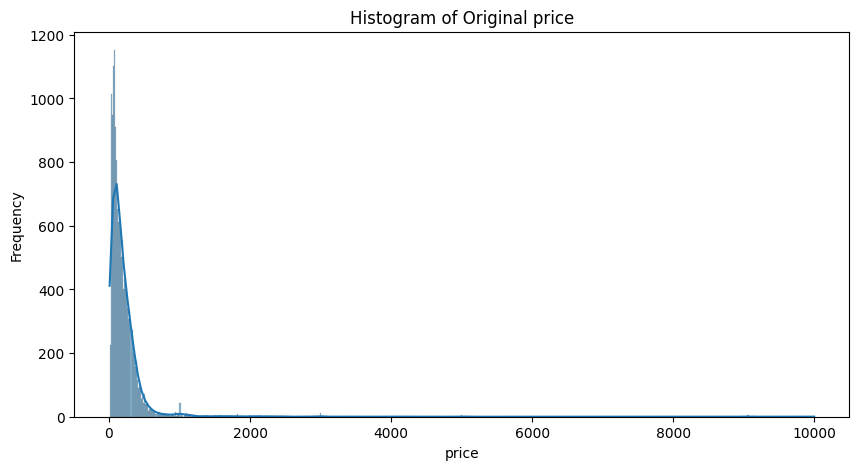

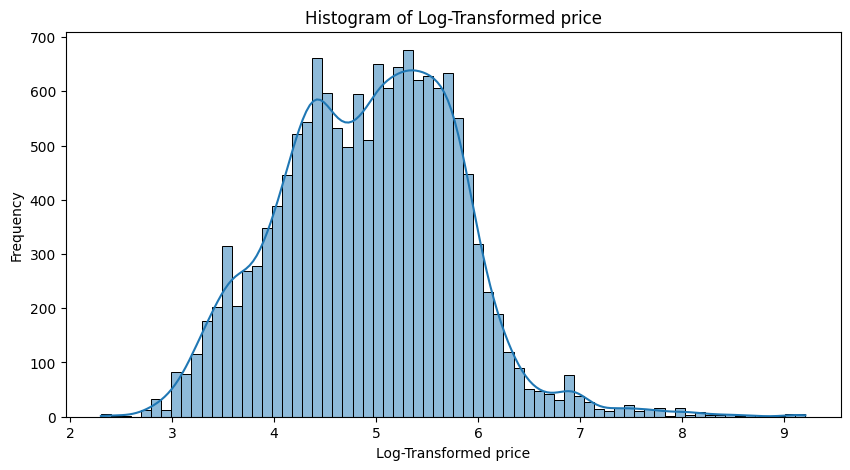

In [2]:
# Choose the 'price' column as it is likely skewed
column_to_transform = 'price'

# Plot the original histogram
plt.figure(figsize=(10, 5))
sns.histplot(df[column_to_transform], kde=True)
plt.title(f'Histogram of Original {column_to_transform}')
plt.xlabel(column_to_transform)
plt.ylabel('Frequency')
plt.show()

# Apply log transformation (add a small constant to handle zero values if necessary)
df['price_log'] = np.log1p(df[column_to_transform])

# Plot the transformed histogram
plt.figure(figsize=(10, 5))
sns.histplot(df['price_log'], kde=True)
plt.title(f'Histogram of Log-Transformed {column_to_transform}')
plt.xlabel(f'Log-Transformed {column_to_transform}')
plt.ylabel('Frequency')
plt.show()

### ✍️ Your Response: 🔧

1. I examined the price column.
2. I applied a log transformation because the price distribution was heavily skewed to the right, with many low values and a few very high values. The log transformation helps to compress the range of values and make the distribution more symmetrical, which is beneficial for many statistical analyses and machine learning models.
3. The transformed version helps make the data more usable by reducing the impact of outliers and making the distribution closer to normal. This makes it easier to visualize trends and make more meaningful summary statistics, and build more robust models for tasks like price prediction. For stakeholders, it allows for clearer insights into typical price ranges after accounting for extreme values.

## 3. Scale Two Numeric Columns

Business framing:

If an analyst wanted to compare listing price to number of nights required, or create a model that weighs both, those values need to be on a similar scale.

Follow these steps:
- Pick two numeric columns with different value ranges (e.g. one column may have a min of 0 and a max of 255; another column may have a min of 100 and a max of 400)
- Use Min-Max scaling on one column (the range should be “shrinked” down to just 0-1)
- Use Z-score Normalization (aka standardization) on the other column.
- Add 2 new columns to the dataset. These 2 new columns should be the ones you just created.

### In Your Response:
1. What two columns did you scale, and which methods did you use?
2. When might these scaled values be more useful than the originals?
3. Who at Airbnb might benefit from this transformation and why?

In [3]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Choose two numeric columns with different value ranges
column1_minmax = 'minimum_nights'
column2_zscore = 'number_of_reviews'

# Min-Max scale
scaler_minmax = MinMaxScaler()
df[f'{column1_minmax}_minmax_scaled'] = scaler_minmax.fit_transform(df[[column1_minmax]])

# Z-score scale
scaler_zscore = StandardScaler()
df[f'{column2_zscore}_zscore_scaled'] = scaler_zscore.fit_transform(df[[column2_zscore]])

# Display the first few rows with the new columns
display(df[[column1_minmax, f'{column1_minmax}_minmax_scaled', column2_zscore, f'{column2_zscore}_zscore_scaled']].head())

,minimum_nights,minimum_nights_minmax_scaled,number_of_reviews,number_of_reviews_zscore_scaled
0,1,0.000000,48,-0.032511
1,3,0.001781,88,0.347636
2,1,0.000000,147,0.908354
3,31,0.026714,25,-0.251096
4,2,0.000890,3,-0.460177


### ✍️ Your Response: 🔧

1. I scaled the minimum_nights column using Min-Max scaling and the number_of_reviews column using Z-score Normalization. I chose these columns because they have different value ranges and distributions.
2. These scaled values are more useful than the originals when you need to compare or combine features that have different units. They bring all values to a similar range or distribution, preventing features with larger values from dominating the analysis or model training.
3. Data analysts and data scientists at Airbnb would benefit greatly from this transformation. Analysts could use the scaled values for visualizations that compare metrics on the same scale, making patterns easier to spot. Data scientists would use these scaled features as inputs for machine learning models to improve model performance and ensure fair weighting of different features.

## 4. Group a Numeric Column into Categories

Business framing:  

Let’s say an Airbnb marketing team wants to segment listings by review activity. They don’t want exact numbers — they just want to know if a listing has “low,” “medium,” or “high” review volume.

Follow these steps:

- Choose a numeric column that could be grouped (e.g., reviews, availability).
- You’ll want to group the values of this column into 3 or 4 bins
- Create a new column. The values of this column will be the labels: “Low”, “Medium”, and “High.” These labels should correspond to your bins.

### In Your Response:
1. What column did you group, and how many categories did you use?
2. Why might someone prefer this grouped view over raw numbers?
3. Who would this help at Airbnb, and how?


In [4]:
# Choose a numeric column to group
column_to_group = 'number_of_reviews'

# Define the bin edges and labels
# Using quantiles to determine bin edges for a more balanced distribution of categories
bins = df[column_to_group].quantile([0, 0.33, 0.66, 1]).tolist()
labels = ['Low', 'Medium', 'High']

# Create the new categorical column
df['review_volume_category'] = pd.cut(df[column_to_group], bins=bins, labels=labels, include_lowest=True)

# Display the first few rows with the new column and the value counts for the new column
display(df[[column_to_group, 'review_volume_category']].head())
display(df['review_volume_category'].value_counts())

,number_of_reviews,review_volume_category
0,48,High
1,88,High
2,147,High
3,25,High
4,3,Medium


,count
review_volume_category,
Low,6646
High,6429
Medium,5852


### ✍️ Your Response: 🔧

1. I grouped the number_of_reviews column into three categories: "Low", "Medium", and "High".
2. Someone might prefer this grouped view over raw numbers because it simplifies the data, making it easier to understand trends and patterns at a high level. It's particularly useful for non-technical stakeholders who need quick insights without getting into the specifics of exact numbers.
3. This transformation would help various roles at Airbnb:
    Marketing team: They could easily target listings with "Low" review volume for campaigns encouraging guests to leave reviews or listings with "High" review volume for promotional materials highlighting popular stays.
    Hosts: Hosts could see where their listing falls in terms of review volume compared to others, helping them understand if they need to focus on encouraging more reviews.
    

## 5. Create Two New Business-Relevant Variables

Business framing:  

Stakeholders often want to know things like: What’s the cost per night? Are listings geared toward long-term stays? These kinds of features aren’t always in the dataset — analysts create them.

Follow these steps:

- Think of two new columns you can create using the data you already have.
  - One might be a ratio or interaction between columns (e.g., price ÷ nights).
  - The other might be a flag based on a condition (e.g., stays longer than 30 days).
- Add the new columns to your DataFrame.

### In Your Response:
1. What two new columns did you create?
2. Who would use them (e.g., host, manager, or platform)?
3. How could they help someone make a better decision?

In [5]:
# Create 'price_per_night'
# Add a small constant to minimum_nights to avoid division by zero if necessary, though minimum_nights is usually >= 1
df['price_per_night'] = df['price'] / df['minimum_nights']

# Create 'long_term_stay_flag' based on minimum_nights >= 30
df['long_term_stay_flag'] = (df['minimum_nights'] >= 30).astype(int)

# Display the first few rows with the new columns
display(df[['price', 'minimum_nights', 'price_per_night', 'long_term_stay_flag']].head())

,price,minimum_nights,price_per_night,long_term_stay_flag
0,232.0,1,232.000000,0
1,382.0,3,127.333333,0
2,186.0,1,186.000000,0
3,131.0,31,4.225806,1
4,285.0,2,142.500000,0


### ✍️ Your Response: 🔧 🔧

1. I created two new columns:
    - **`price_per_night`**: Calculated as `price` / `minimum_nights`. This represents the average cost for a single night's stay, taking into account the minimum night requirement.
    - **`long_term_stay_flag`**: A binary flag (0 or 1) that is 1 if the `minimum_nights` is 30 or more, and 0 otherwise. This identifies listings primarily aimed at longer stays.
2. **`price_per_night`** would be used by hosts, analysts, and the platform. `long_term_stay_flag`  would primarily be used by analysts and the platform, though hosts could benefit from understanding this segmentation.
3. These new columns can help someone make a better decision in several ways:
    Hosts: By looking at `price_per_night`, hosts can better understand their pricing relative to the length of stay required and compare it to other listings. The `long_term_stay_flag` can help them identify if their listing's minimum stay aligns with market demand for long term rentals.
    Analysts: `price_per_night` provides a standardized metric to compare the cost effectiveness of different listings, regardless of their minimum stay. The `long_term_stay_flag` allows analysts to easily segment the market and analyze the characteristics and performance of listings targeting long term guests versus short term guests. This helps in market analysis and identifying trends.
    

## 6. Encode a Categorical Column

Business framing:  

Let’s say you’re helping the Airbnb data science team build a model to predict booking rates. Categorical columns like `room_type`, `neighbourhood`, or `cancellation_policy` can’t be used in models unless they’re converted to numbers.

- Choose one categorical column from your dataset (e.g., room type or neighborhood group)
- Decide on an encoding method:
  - Use one-hot encoding for nominal (unordered) categories
  - Use ordinal encoding (a ranking) only if the categories have a clear order
- Apply the encoding using `pandas` or another tool
- Add the new encoded column(s) to your DataFrame

### ✍️ In your markdown:
1. What column did you encode and why?
2. What encoding method did you use?
3. How could this transformation help a pricing model, dashboard, or business report?



In [6]:
# Choose a categorical column to encode
column_to_encode = 'room_type'

# Apply one-hot encoding as 'room_type' is a nominal category
df = pd.get_dummies(df, columns=[column_to_encode], prefix=column_to_encode, dtype=int)

# Display the first few rows with the new encoded columns
display(df[[f'{column_to_encode}_Entire home/apt', f'{column_to_encode}_Private room', f'{column_to_encode}_Shared room', f'{column_to_encode}_Hotel room']].head())

,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,room_type_Hotel room
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


### ✍️ Your Response: 🔧

1. I encoded the `room_type` column. I chose this column because it's a categorical variable that is relevant for understanding listing characteristics and is commonly used in predictive models.
2. I used one-hot encoding. This method is suitable because `room_type` is a nominal categorical variable; there is no ranking between the different room types. One-hot encoding creates new binary columns for each unique category, which can be directly used in most machine learning algorithms.
3. This transformation is crucial for helping a pricing model, dashboard, or business report because:
    Pricing Model: Machine learning models typically require numerical input. One-hot encoding converts the categorical `room_type` into a numerical format that the model can understand and use to identify how different room types influence pricing.
    Dashboard: On a dashboard, instead of just showing the count of each room type, you could use the one-hot encoded columns to filter data, compare average prices or availability across room types, or visualize the distribution of room types in different neighborhoods.
    Business Report: In a business report, you can easily present the proportion of each room type or analyze the performance metrics for each room type category, providing clear insights to stakeholders.

## 7. Reflection

You’ve applied the same kinds of transformation techniques used in real Airbnb analytics projects — from pricing engines to host tools to tourism dashboards.

Now step back and reflect.

### In Your Response:
1. What transformation step felt most important or interesting?
2. Which of your changes would be most useful to a host, analyst, or city planner?
3. If you were going to build a tool or dashboard, what would you do next with this data?
4. How does this relate to your customized learning outcome you created in canvas?



### ✍️ Your Response: 🔧

1. The log transformation of the price column felt most important. Price is a key metric for both hosts and guests, and its heavily skewed distribution in raw form makes it challenging to analyze accurately. Transforming it allows for more reliable statistical analysis and modeling, providing a clearer picture of typical pricing and the impact of other factors on price.
2. To a Host: The **`price_per_night`** variable would be most useful. It provides a simple metric to compare their listing's value proposition against others, helping them set competitive prices and understand guest expectations based on the minimum stay.
    - To an Analyst: The scaled columns (`minimum_nights_minmax_scaled` and `number_of_reviews_zscore_scaled`) and the one-hot encoded `room_type` columns would be most useful. These are essential for building robust predictive models and for conducting analyses that require comparing features on a similar scale.
    - To a City Planner: The **`long_term_stay_flag`** and potentially the grouped `review_volume_category` could be most useful. City planners might be interested in understanding the prevalence of long-term rentals in different areas or identifying areas with high review activity, which could indicate popular tourist spots or areas with high resident satisfaction.
3. If I were going to build a tool or dashboard, I would next focus on exploratory data analysis (EDA) using the transformed data. I would look for correlations between the new features and key metrics like booking rate or review scores. I would also create visualizations that leverage the scaled and encoded data to show trends and comparisons across different listing types and locations. This EDA would inform the design of a dashboard that provides actionable insights to hosts and analysts, perhaps focusing on optimizing pricing or improving guest experience based on the transformed features.
4. This assignment directly relates to my customized learning outcome focused on "Applying data cleaning and transformation techniques to prepare real world datasets for analysis and visualization." By loading, cleaning (from Assignment 6), and now transforming this Airbnb dataset, I have practiced essential skills in handling messy, real world data. The transformations performed scaling, binning, encoding, and feature creation—are fundamental steps in making data ready for further analysis, modeling, and creating informative visualizations or reports, which aligns perfectly with my goal of preparing data for practical use.

## Submission Instructions
✅ Checklist:
- All code cells run without error
- All markdown responses are complete
- Submit on Canvas as instructed

In [7]:
!jupyter nbconvert --to html "assignment_07_MillerAaron.ipynb"

[NbConvertApp] Converting notebook assignment_07_MillerAaron.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 2 image(s).
[NbConvertApp] Writing 433551 bytes to assignment_07_MillerAaron.html
